# Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import ydata_profiling

In [2]:
pip install ydata-profiling

     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     ---------------------------------------- 125.2/125.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/359.5 kB ? eta -:--:--
   --------------------------------------- 359.5/359.5 kB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/423.9 kB ? eta -:--:--
   --------------------------------------- 423.9/423.9 kB 13.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   --------------------- ------------------ 1.0/1.9 MB 22.0 MB/s eta 0:00:01
   ---------------------------------------  1.9/1.9 MB 23.9 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 23.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/104.8 kB ? eta -:--:--
   ---------------------------------------- 104.8/104.8 kB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -------------------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.8.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [2]:
pip install --upgrade numba

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB 7.7 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.7 MB 11.2 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 16.5 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 15.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/28.1 MB 21.1 MB/s eta 0:00:02
   -- ------------------------------------- 2.0/28.1 MB 21.6 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/28.1 MB 21.9 MB/s eta 0:00:02
   ----- ---------------------------------- 4.0/28.1 MB 21.4 MB/s eta 0:00:02
   ------- -------------------------------- 5.1/28.1 MB 21.7 MB/s eta 0:00:02
   -------- ------------------------------- 6.0/28.1 MB 21.2 MB/s eta 0:00:02
   ---------- ----------------------------- 7.3/28.1 MB 22.3 MB/s eta 0:00:01
   -----

  You can safely remove it manually.
  You can safely remove it manually.


# Loading data

In [3]:
# Import files
path=r'C:\Users\asicz\OneDrive\Dokumenty\CareerFoundry_Data_Analyst_Course\Data Immersion\Achievement 4\20240508_Instacart_Basket_Analysis'
ord_prod_cust = pd.read_pickle(os.path.join(path, '02_Data','Prepared_Data', 'ords_prods_customers_merge.pkl'))

In [ ]:
# Profiling
profile = ord_prod_cust.profile_report(title="Instacart dataset report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# Save the report
profile.to_file("report.json")

In [105]:
ord_prod_cust.shape

(32435059, 34)

# Check for the PII in the data

In [3]:
# Show the column names to identify potentially sensitive data
ord_prod_cust.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', '1st_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price_user',
       'spender_type', 'med_days_since_prior_order', 'frequency_flag', 'name',
       'surname', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', '_merge'],
      dtype='object')

#### 'name' and 'surname' columns contain personal data which have to be carefully handled. If any of these has to be involved in the future analysis, we may consider anonimizing or masking these fields if the data needs to be presented. If we need to get back to a particular user based on the analysis results - we need to decode the observation to get back to the full name.

# Customer behavior in different geographic areas

In [130]:
# Create a dataframe subset to analyze spending habits in different US regions
col_list =  ['user_id', 'product_name','prices', 'price_range','loyalty_flag', 'avg_price_user',
       'spender_type', 'state'] # Since we are dealing with a huge table, let's keep only the columns we are going to work with
spendings = ord_prod_cust[col_list]

In [129]:
# Create a list with geographical regions assigning each state to a specific region
result = []

for value in spendings['state']:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result.append('Northeast')
  elif value in ['Wisconsin','Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result.append('Midwest')
  elif value in ['Delaware', ' Maryland', ' District of Columbia', ' Virginia', ' West Virginia', ' North Carolina', ' South Carolina', ' Georgia', ' Florida',
                'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    result.append('South')  
  else:
    result.append('West')

In [131]:
# Create a column with geographical regions
spendings['region'] = result
spendings['region'].value_counts(dropna=False)

C:\Users\asicz\AppData\Local\Temp\ipykernel_10592\223994585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spendings['region'] = result


region
West         13373740
Midwest       7604016
South         5728859
Northeast     5728444
Name: count, dtype: int64

In [7]:
spendings.head()

,user_id,product_name,prices,price_range,loyalty_flag,avg_price_user,spender_type,state,region
0,1,Soda,9.0,Mid-range product,New customer,6.367797,Low spender,Alabama,South
1,1,Organic Unsweetened Vanilla Almond Milk,12.5,Mid-range product,New customer,6.367797,Low spender,Alabama,South
2,1,Original Beef Jerky,4.4,Low-range product,New customer,6.367797,Low spender,Alabama,South
3,1,Aged White Cheddar Popcorn,4.7,Low-range product,New customer,6.367797,Low spender,Alabama,South
4,1,XL Pick-A-Size Paper Towel Rolls,1.0,Low-range product,New customer,6.367797,Low spender,Alabama,South


In [8]:
# Check the spender type against the geographical region
cross_tab = pd.crosstab(spendings['spender_type'], spendings['region'])
print(cross_tab)

region        Midwest  Northeast    South      West
spender_type                                       
High spender    29256      18618    22526     49097
Low spender   7574717    5709781  5706209  13324472


In [9]:
# Normalize the results
cross_tab_normalized = pd.crosstab(spendings['spender_type'], spendings['region'], normalize='columns') * 100 # Normalized cross_tab table
print(cross_tab_normalized)

region          Midwest  Northeast      South      West
spender_type                                           
High spender   0.384746   0.325012   0.393211   0.36712
Low spender   99.615254  99.674988  99.606789  99.63288


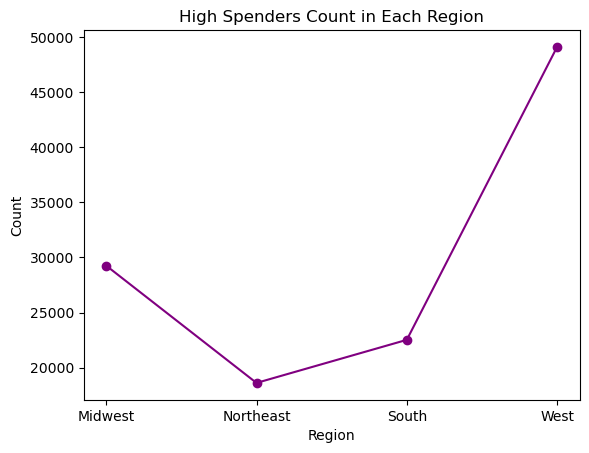

In [10]:
# Plot high spenders against the regions
high_spenders = cross_tab.loc['High spender'] # Extract the row corresponding to 'High spender'
regions = high_spenders.index.tolist() # Extracting region names from the columns
spender_counts = high_spenders.values.tolist() # Extracting spender counts from the values
plt.plot(regions, spender_counts, marker='o', linestyle='-', color='purple', label='High Spenders') # Make line plot of high spenders
# Add title and labels
plt.title('High Spenders Count in Each Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'line_high-spenders_regions.png')) # Save the plot

#### All the geographical reagions have a very similar distribution of spender types. It's always around 99.6% of low spenders, therefore the proportions of high spenders in all reagions are all the same and all very low. When analyzing each region by numbers we see that region West contains many more high spenders comparing to other regions, as there are also far more customers.

# Exclude low-activity customers

In [11]:
# Create exlucions criteria for customers with less than 5 orders
ord_prod_cust.loc[ord_prod_cust['max_order'] < 5, 'low_activity'] = 'Yes' # Mark the low activity customers
ord_prod_cust_filtered = ord_prod_cust[ord_prod_cust['low_activity'] != 'Yes'] # Exclude low activity customers

In [12]:
ord_prod_cust_filtered.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,1st_order,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,low_activity
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,NaN
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,NaN
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,NaN
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,NaN
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,NaN


In [13]:
# Drop the low activity column 
ord_prod_cust_filtered2 = ord_prod_cust_filtered.drop(columns=['low_activity'])

In [14]:
ord_prod_cust_filtered2.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,1st_order,product_id,add_to_cart_order,reordered,...,name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


In [15]:
# Save the output
ord_prod_cust_filtered2.to_pickle(os.path.join(path, '02_Data','Prepared_Data', 'ord_prod_cust_high-activity.pkl'))

# Customer profiling

In [ ]:
# Choose relevant columns for customer profiling
profiles = ord_prod_cust.drop(columns=['1st_order','days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'aisle_id', 'busiest_days',
       'busiest_period_of_day', 'med_days_since_prior_order', 'frequency_flag', '_merge', 'low_activity'])

In [132]:
profiles['region'] = spendings['region']

In [18]:
profiles.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,product_name,department_id,prices,price_range,max_order,...,name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,Soda,7.0,9.0,Mid-range product,10,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,South
1,2539329,1,1,2,8,Organic Unsweetened Vanilla Almond Milk,16.0,12.5,Mid-range product,10,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,South
2,2539329,1,1,2,8,Original Beef Jerky,19.0,4.4,Low-range product,10,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,South
3,2539329,1,1,2,8,Aged White Cheddar Popcorn,19.0,4.7,Low-range product,10,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,South
4,2539329,1,1,2,8,XL Pick-A-Size Paper Towel Rolls,17.0,1.0,Low-range product,10,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,South


#### Now we need to think of criteria to assign different cusomers to. Let's explore and extract different combinations of data.

In [19]:
print('The minimun customer age is: ', profiles['age'].min()) # We are checking for min age of customers
print('The maximum customer age is: ', profiles['age'].max()) # ...and for the max age of customers

The minimun customer age is:  18
The maximum customer age is:  81


#### Every customer is an adult. In the next step we will bin the age and check the orders and how much each age category spent and how mant times they ordered. 

In [20]:
# Bin the ages of customer into 10 year categories
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-90']
profiles['age_category'] = pd.cut(profiles['age'], bins=bins, labels=labels, right=False)

In [21]:
# Check how many customers are present in each age category
profiles['age_category'].value_counts(dropna=False)

age_category
40-49    5114044
30-39    5078203
20-29    5075188
50-59    5069148
70-79    5059773
60-69    4992142
80-90    1025464
0-19     1021097
Name: count, dtype: int64

#### The age distribution is quite uniform, the youngest and oldest are underrepresented due to the binning type.

In [22]:
# Check the prices of the products ordered within each age category
profiles.groupby('age_category').agg({'prices': ['mean','min','max']})

C:\Users\asicz\AppData\Local\Temp\ipykernel_10592\3100710533.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('age_category').agg({'prices': ['mean','min','max']})


prices           
                  mean  min   max
age_category                     
0-19          7.806374  1.0  25.0
20-29         7.778557  1.0  25.0
30-39         7.788844  1.0  25.0
40-49         7.799164  1.0  25.0
50-59         7.784823  1.0  25.0
60-69         7.799339  1.0  25.0
70-79         7.789903  1.0  25.0
80-90         7.802400  1.0  25.0

C:\Users\asicz\AppData\Local\Temp\ipykernel_10592\3237184012.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('age_category').agg({'prices': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')


<Figure size 1000x600 with 0 Axes>

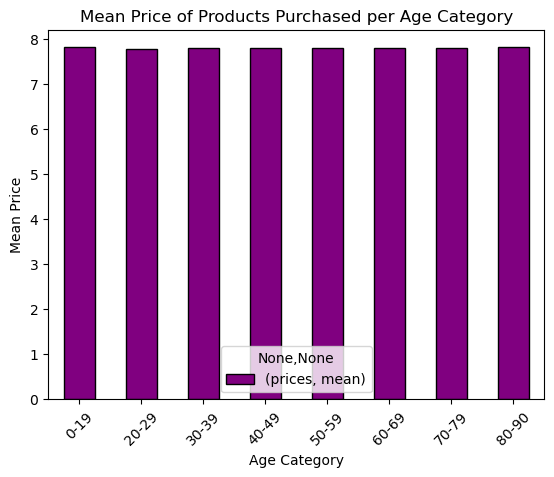

In [23]:
# Plot distribution of prices within age categories as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('age_category').agg({'prices': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Mean Price')
plt.title('Mean Price of Products Purchased per Age Category')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_price_age-group.png')) # Save the plot

In [24]:
# Check the orders within each age category
profiles.groupby('age_category').agg({'max_order': ['mean','min','max']})

C:\Users\asicz\AppData\Local\Temp\ipykernel_10592\3003582466.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('age_category').agg({'max_order': ['mean','min','max']})


max_order        
                   mean min max
age_category                   
0-19          33.219282   3  99
20-29         32.953717   3  99
30-39         33.266133   3  99
40-49         33.051306   3  99
50-59         33.057620   3  99
60-69         32.992989   3  99
70-79         32.858702   3  99
80-90         33.538102   3  99

C:\Users\asicz\AppData\Local\Temp\ipykernel_10592\1484488199.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('age_category').agg({'max_order': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')


<Figure size 1000x600 with 0 Axes>

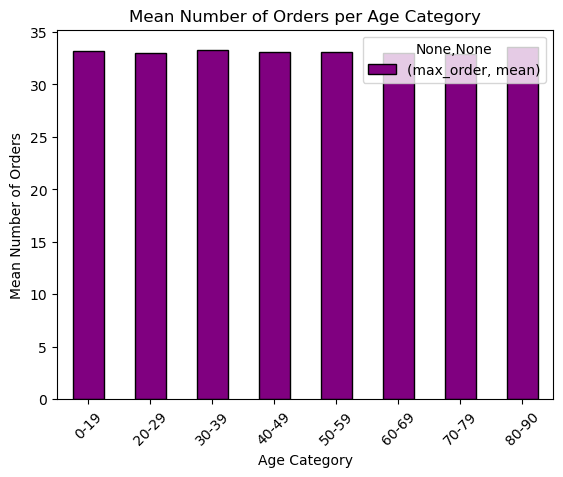

In [25]:
# Plot distribution of orders within age categories as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('age_category').agg({'max_order': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Mean Number of Orders')
plt.title('Mean Number of Orders per Age Category')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_orders_age-group.png')) # Save the plot

#### We can clearly see that the number of orders as well as the amount of money spent does not depend on age of the customers. We move on to analyze customer profiles by income.

In [26]:
print('The minimun customer income is: ', profiles['income'].min()) # We are checking for min income of customers
print('The maximum customer income is: ', profiles['income'].max()) # ...and for the max income of customers

The minimun customer income is:  25903
The maximum customer income is:  593901


In [27]:
# Bin the income of customer into 50k categories
bins = [25000, 75000, 125000, 175000, 225000, 275000, 325000, 375000, 425000, 475000, 525000, 575000, 625000]
labels = ['25000-75000', '75001-125000', '125001-175000', '175001-225000', '225001-27500', '275001-325000', '325001-375000', '375001-425000', '425001-475000', '475001-525000', '525001-575000', '575001-625000']
profiles['income_category'] = pd.cut(profiles['income'], bins=bins, labels=labels, right=False)

In [28]:
# Check how many customers are present in each income category
profiles['income_category'].value_counts(dropna=False)

income_category
75001-125000     13343232
25000-75000      10453129
125001-175000     8331146
175001-225000       87997
225001-27500        78652
275001-325000       51415
325001-375000       30760
375001-425000       23315
425001-475000       12163
525001-575000        9732
475001-525000        9305
575001-625000        4213
Name: count, dtype: int64

In [29]:
# Check the prices of the products ordered within each income category
profiles.groupby('income_category').agg({'prices': ['mean','min','max']})

C:\Users\asicz\AppData\Local\Temp\ipykernel_10592\767505731.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('income_category').agg({'prices': ['mean','min','max']})


prices           
                     mean  min   max
income_category                     
25000-75000      7.434729  1.0  25.0
75001-125000     7.962545  1.0  25.0
125001-175000    7.963271  1.0  25.0
175001-225000    7.806917  1.0  25.0
225001-27500     7.782349  1.0  25.0
275001-325000    7.819582  1.0  25.0
325001-375000    7.770072  1.0  25.0
375001-425000    7.822505  1.0  25.0
425001-475000    7.631919  1.0  25.0
475001-525000    7.896991  1.0  25.0
525001-575000    7.707031  1.0  24.5
575001-625000    7.619986  1.0  25.0

C:\Users\asicz\AppData\Local\Temp\ipykernel_10592\1853207089.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('income_category').agg({'prices': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')


<Figure size 1000x600 with 0 Axes>

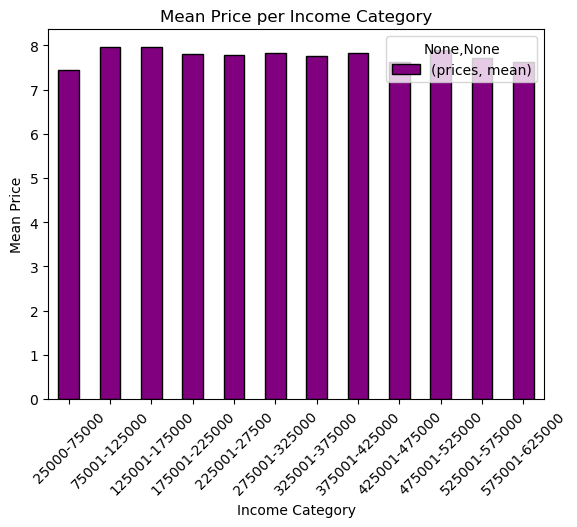

In [30]:
# Plot distribution of prices within income categories as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('income_category').agg({'prices': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')

# Add labels and title
plt.xlabel('Income Category')
plt.ylabel('Mean Price')
plt.title('Mean Price per Income Category')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_prices_income-group.png')) # Save the plot

In [31]:
# Check the orders within each income category
profiles.groupby('income_category').agg({'max_order': ['mean','min','max']})

C:\Users\asicz\AppData\Local\Temp\ipykernel_10592\3687362349.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('income_category').agg({'max_order': ['mean','min','max']})


max_order        
                      mean min max
income_category                   
25000-75000      32.462192   3  99
75001-125000     33.351218   3  99
125001-175000    33.145176   3  99
175001-225000    35.999523   3  99
225001-27500     38.806807   3  99
275001-325000    36.298123   3  99
325001-375000    44.270611   3  99
375001-425000    37.179284   3  99
425001-475000    37.754584   3  99
475001-525000    25.515637   3  50
525001-575000    32.652898   3  99
575001-625000    57.582720   6  83

C:\Users\asicz\AppData\Local\Temp\ipykernel_10592\1711648750.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profiles.groupby('income_category').agg({'max_order': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')


<Figure size 1000x600 with 0 Axes>

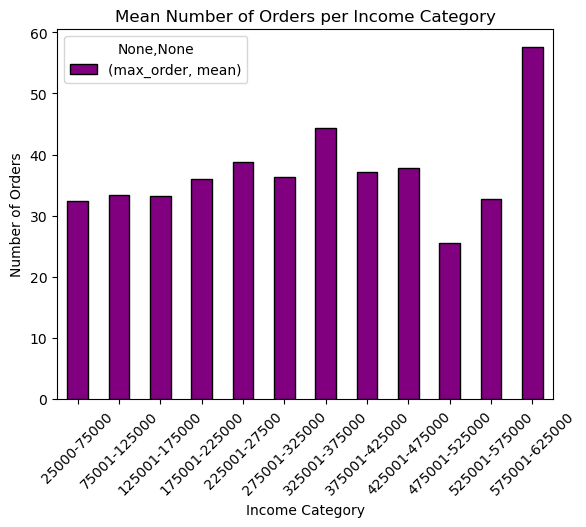

In [32]:
# Plot distribution of orders within income categories as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('income_category').agg({'max_order': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')

# Add labels and title
plt.xlabel('Income Category')
plt.ylabel('Number of Orders')
plt.title('Mean Number of Orders per Income Category')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_orders_income-group.png')) # Save the plot

#### Even though we don't see differences in average prices paid according to income categories, we do see differences in number of orders made in each of income categories. Definitely, the customers at the high-end of incomes order the most, and it's about twice as much as other categories, even though the lowest income customers are the most numerous.

#### Now we check the shopping per department

In [33]:
profiles.groupby('department_id').agg({'prices': ['mean','min','max']}) # Prices by department

prices           
                    mean  min   max
department_id                      
1.0             7.736553  1.0  15.0
2.0             6.990934  1.1  15.0
3.0             7.853809  1.0  15.0
4.0             7.981708  1.0  15.0
5.0             8.143701  1.0  15.0
6.0             7.682264  1.0  15.0
7.0             7.680502  1.0  15.0
8.0             7.889070  1.0  15.0
9.0             7.350283  1.0  15.0
10.0            8.348960  1.4  14.1
11.0            7.996769  1.0  15.0
12.0           16.294443  8.0  25.0
13.0            8.009443  1.0  20.0
14.0            8.028963  1.0  14.9
15.0            7.539976  1.0  15.0
16.0            8.335056  1.0  15.0
17.0            7.384058  1.0  15.0
18.0            7.638380  1.0  15.0
19.0            4.275437  1.6   7.0
20.0            7.778701  1.0  15.0
21.0            8.660716  1.0  15.0

In [34]:
profiles.groupby('department_id').agg({'max_order': ['mean','min','max']}) # Order numbers by department

max_order        
                    mean min max
department_id                   
1.0            30.335329   3  99
2.0            31.908131   3  99
3.0            33.428724   3  99
4.0            34.022678   3  99
5.0            29.982986   3  99
6.0            31.589126   3  99
7.0            33.177486   3  99
8.0            29.598837   3  99
9.0            30.668129   3  99
10.0           37.891042   3  99
11.0           30.528507   3  99
12.0           31.122499   3  99
13.0           32.026048   3  99
14.0           32.811299   3  99
15.0           30.326645   3  99
16.0           34.322288   3  99
17.0           29.926944   3  99
18.0           37.881202   3  99
19.0           33.427779   3  99
20.0           32.396779   3  99
21.0           29.417268   3  99

In [35]:
aggregated = profiles.groupby('department_id').agg({'max_order': ['mean', 'min', 'max']}) # Define the max orders again as a variable

aggregated.columns = ['mean_order', 'min_order', 'max_order'] # Flatten the column names
mean_of_means = aggregated['mean_order'].mean() # Calculate the mean of the means
std_of_means = aggregated['mean_order'].std() # Calculate the standard deviation of the means

print('Average number of orders in all departments is ', mean_of_means, '+/-', std_of_means )


Average number of orders in all departments is  32.22808232801349 +/- 2.400280964096642


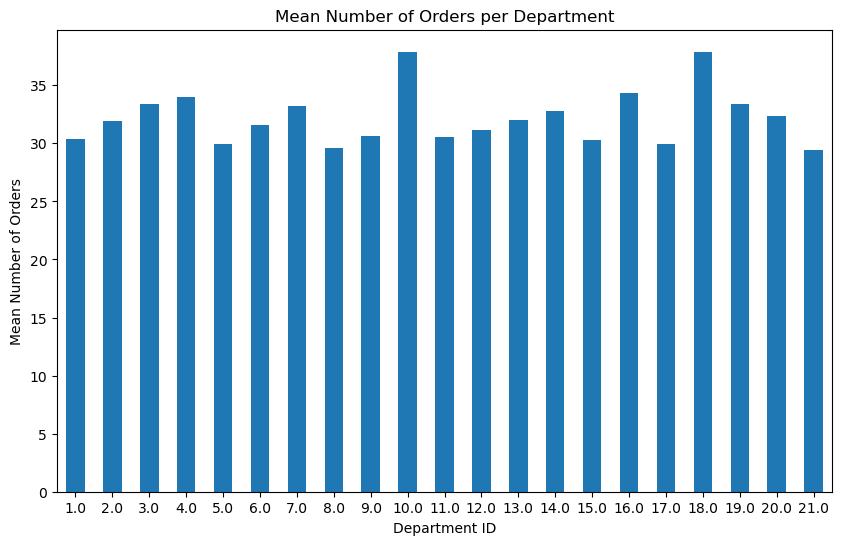

In [107]:
# Plot the mean number of orders per department
ord_dep = profiles.groupby('department_id')['max_order'].mean()
ord_dep.plot(kind='bar', figsize=(10, 6))
# Labels
plt.xlabel('Department ID')
plt.ylabel('Mean Number of Orders')
plt.title('Mean Number of Orders per Department')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_orders_departments.png')) # Save the plot

#### Based on the data above, we can see that the highest prices and highest average prices are achieved by department 12 and the lowest by department 19. The average number of orders vary between the departments but overall it differs only slightly. the highest number of orders was observed in departments 10 and 18, the lowest in 5, 8, 17 & 21.


#### Next, we will organize the customers based on their gender, family status, number of family members

In [36]:
# Let's start with genders
# Check how many customers are present in each age category
profiles['gender'].value_counts(dropna=False)

gender
Male      16330051
Female    16105008
Name: count, dtype: int64

In [37]:
# Prices by gender
profiles.groupby('gender').agg({'prices': ['mean','min','max']})

prices           
            mean  min   max
gender                     
Female  7.788651  1.0  25.0
Male    7.793305  1.0  25.0

In [38]:
# Orders by gender
profiles.groupby('gender').agg({'max_order': ['mean','min','max']})

max_order        
             mean min max
gender                   
Female  33.206771   3  99
Male    32.899986   3  99

#### The number of male and female customers is similar, as well as the spendings and number of orders made by each gender.

In [39]:
# Checking family status
profiles['fam_status'].value_counts(dropna=False)

fam_status
married                             22777499
single                               5330885
divorced/widowed                     2774460
living with parents and siblings     1552215
Name: count, dtype: int64

In [40]:
# Checking number of family members
profiles['n_dependants'].value_counts(dropna=False)

n_dependants
3    8142515
0    8105345
2    8098734
1    8088465
Name: count, dtype: int64

In [41]:
# Check the family status against family members
cross_fam = pd.crosstab(profiles['fam_status'], profiles['n_dependants'])
print(cross_fam)

n_dependants                            0        1        2        3
fam_status                                                          
divorced/widowed                  2774460        0        0        0
living with parents and siblings        0   530629   508546   513040
married                                 0  7557836  7590188  7629475
single                            5330885        0        0        0


In [42]:
# Flag different family situations based on the table above to check potential differences in ordering
profiles.loc[(profiles['fam_status'] == 'divorced/widowed') | (profiles['fam_status'] == 'single'), 'family_flag'] = 'alone adult'
profiles.loc[(profiles['fam_status'] == 'married') & (profiles['n_dependants'] == 1), 'family_flag'] = 'two adults'
profiles.loc[(profiles['fam_status'] == 'married') & (profiles['n_dependants'] > 1), 'family_flag'] = 'two adults with kids'
profiles.loc[profiles['fam_status'] == 'living with parents and siblings', 'family_flag'] = 'dependent adult'

# Checking the family_flag values
print(profiles['family_flag'].value_counts(dropna=False))

family_flag
two adults with kids    15219663
alone adult              8105345
two adults               7557836
dependent adult          1552215
Name: count, dtype: int64


In [43]:
# Check the prices of the products ordered within each family flag
profiles.groupby('family_flag').agg({'prices': ['mean','min','max']})

prices           
                          mean  min   max
family_flag                              
alone adult           7.789975  1.0  25.0
dependent adult       7.800712  1.0  25.0
two adults            7.795712  1.0  25.0
two adults with kids  7.788203  1.0  25.0

In [55]:
# Check the prices of the products ordered within each family flag by regions
profiles.groupby(['family_flag', 'region']).agg({'prices': ['mean','min','max']})

prices           
                                    mean  min   max
family_flag          region                        
alone adult          Midwest    7.794259  1.0  25.0
                     Northeast  7.785759  1.0  25.0
                     South      7.789317  1.0  25.0
                     West       7.789603  1.0  25.0
dependent adult      Midwest    7.814428  1.0  25.0
                     Northeast  7.764374  1.0  25.0
                     South      7.799321  1.0  25.0
                     West       7.808719  1.0  25.0
two adults           Midwest    7.792098  1.0  25.0
                     Northeast  7.781692  1.0  25.0
                     South      7.800731  1.0  25.0
                     West       7.801817  1.0  25.0
two adults with kids Midwest    7.789657  1.0  25.0
                     Northeast  7.782802  1.0  25.0
                     South      7.795106  1.0  25.0
                     West       7.786727  1.0  25.0

In [56]:
# Check the orders within each family flag by regions
profiles.groupby(['family_flag', 'region']).agg({'max_order': ['mean','min','max']})

max_order        
                                     mean min max
family_flag          region                      
alone adult          Midwest    33.179555   3  99
                     Northeast  32.810458   3  99
                     South      33.310705   3  99
                     West       33.573863   3  99
dependent adult      Midwest    32.597562   3  99
                     Northeast  35.017498   3  99
                     South      33.082824   3  99
                     West       33.443398   3  99
two adults           Midwest    32.822393   3  99
                     Northeast  33.169248   3  99
                     South      32.396694   3  99
                     West       32.962208   3  99
two adults with kids Midwest    32.144241   3  99
                     Northeast  33.248319   3  99
                     South      33.209207   3  99
                     West       33.212853   3  99

#### We can see form above results that the family flag didn't show any differences in ordering and pricing.

In [57]:
# Check the prices within each family flag by departments
profiles.groupby(['family_flag', 'department_id']).agg({'prices': ['mean','min','max']})

prices           
                                        mean  min   max
family_flag          department_id                     
alone adult          1.0            7.743498  1.0  15.0
                     2.0            6.955401  1.1  15.0
                     3.0            7.829850  1.0  15.0
                     4.0            7.990996  1.0  15.0
                     5.0            7.996682  1.0  15.0
...                                      ...  ...   ...
two adults with kids 17.0           7.382550  1.0  15.0
                     18.0           7.662848  1.0  15.0
                     19.0           4.273887  1.6   7.0
                     20.0           7.759372  1.0  15.0
                     21.0           8.605985  1.0  15.0

[84 rows x 3 columns]

In [58]:
# Check the orders within each family flag by departments
profiles.groupby(['family_flag', 'department_id']).agg({'max_order': ['mean','min','max']})

max_order        
                                         mean min max
family_flag          department_id                   
alone adult          1.0            30.334338   3  99
                     2.0            32.292425   3  99
                     3.0            33.451293   3  99
                     4.0            34.292373   3  99
                     5.0            32.395189   3  99
...                                       ...  ..  ..
two adults with kids 17.0           30.125299   3  99
                     18.0           38.040662   3  99
                     19.0           33.386792   3  99
                     20.0           32.275734   3  99
                     21.0           29.490629   3  99

[84 rows x 3 columns]

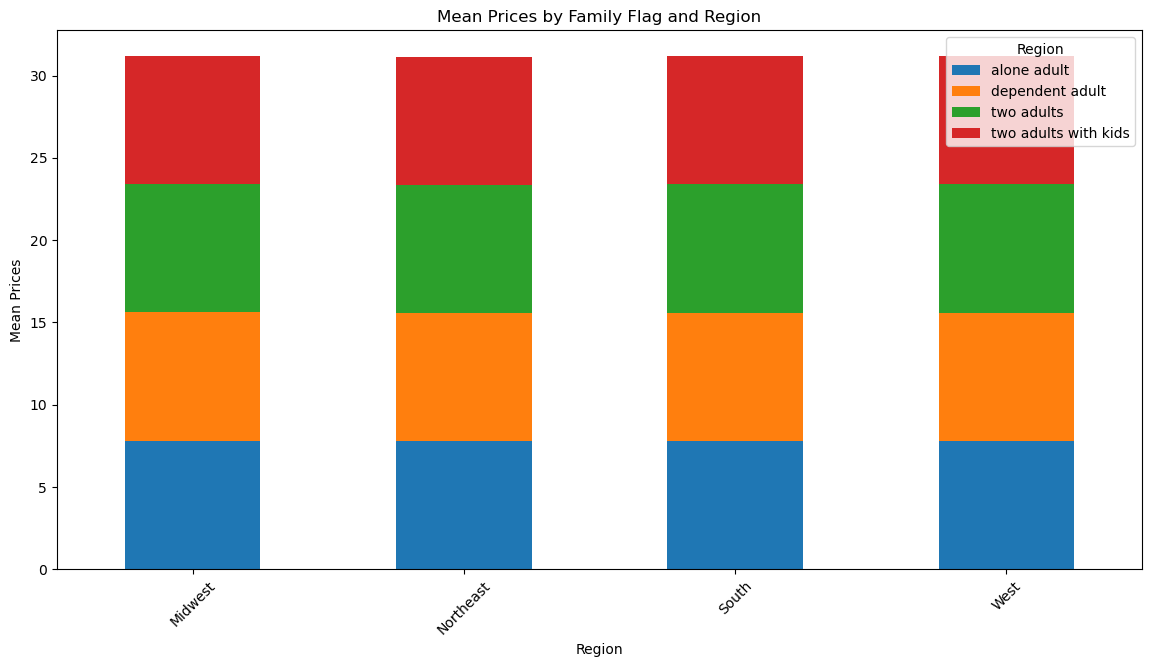

In [92]:
# Group by 'family_flag' and 'region', then calculate mean of 'prices'
grouped = profiles.groupby(['region', 'family_flag'])['prices'].mean().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel('Region')
plt.ylabel('Mean Prices')
plt.title('Mean Prices by Family Flag and Region')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_prices_fam-flag_region.png')) # Save the plot

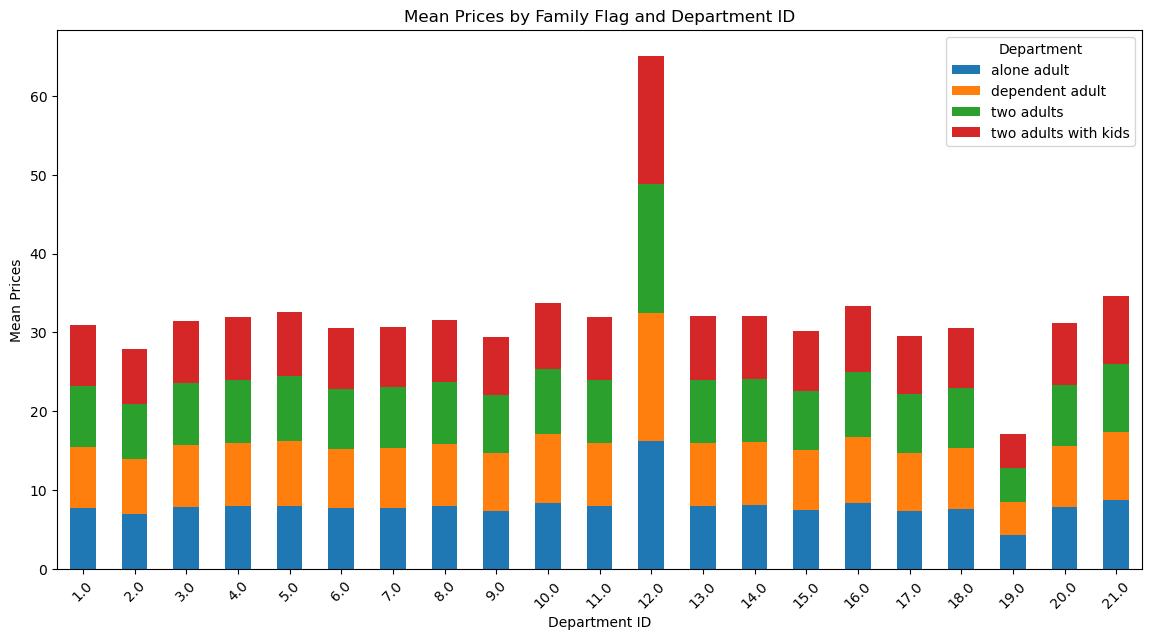

In [93]:
# Group by 'family_flag' and 'department_id', then calculate mean of 'prices'
grouped = profiles.groupby(['department_id', 'family_flag'])['prices'].mean().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel('Department ID')
plt.ylabel('Mean Prices')
plt.title('Mean Prices by Family Flag and Department ID')
plt.legend(title='Department')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_prices_fam-flag_department.png')) # Save the plot

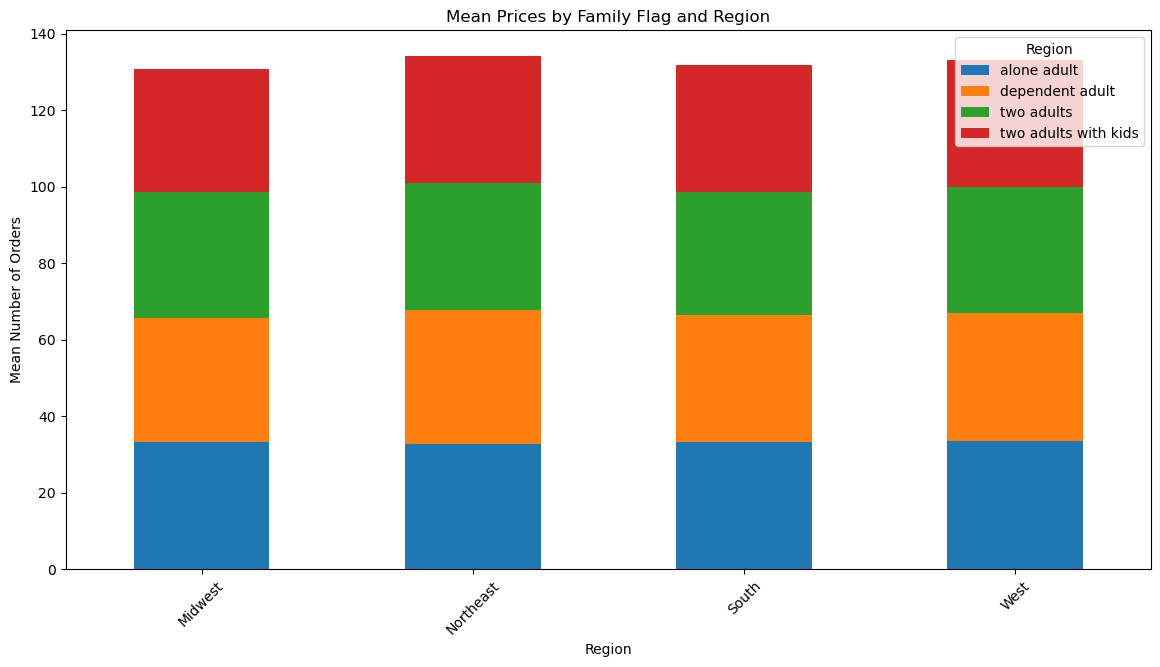

In [94]:
# Group by 'family_flag' and 'region', then calculate mean of 'prices'
grouped = profiles.groupby(['region', 'family_flag'])['max_order'].mean().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel('Region')
plt.ylabel('Mean Number of Orders')
plt.title('Mean Prices by Family Flag and Region')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_orders_fam-flag_region.png')) # Save the plot

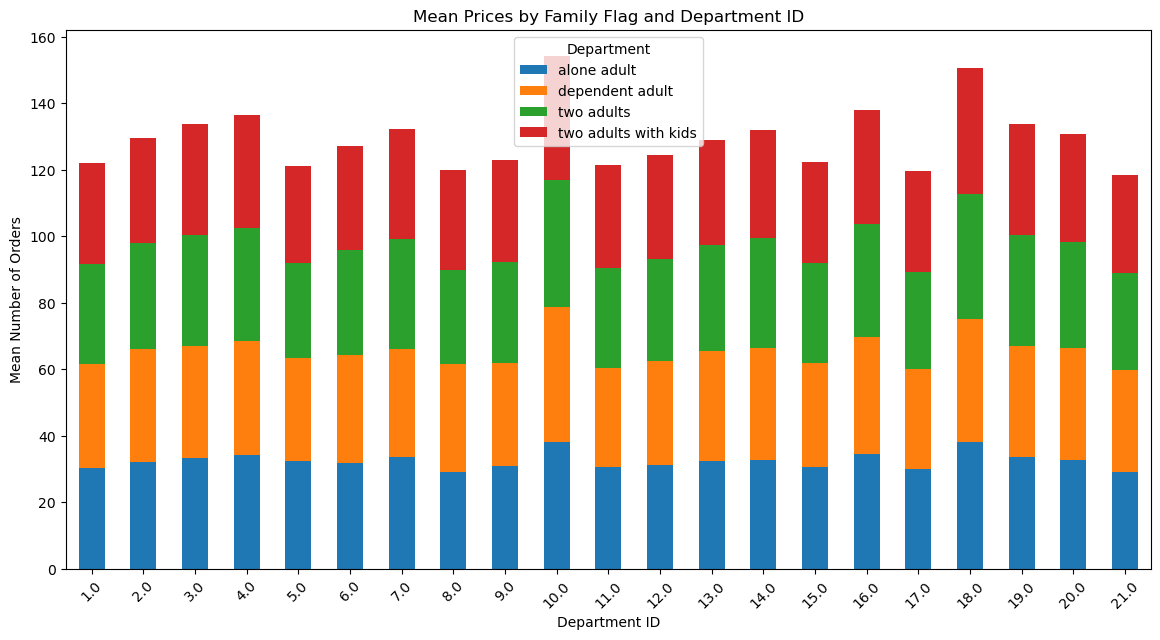

In [95]:
# Group by 'family_flag' and 'department_id', then calculate mean of 'prices'
grouped = profiles.groupby(['department_id', 'family_flag'])['max_order'].mean().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel('Department ID')
plt.ylabel('Mean Number of Orders')
plt.title('Mean Prices by Family Flag and Department ID')
plt.legend(title='Department')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_prices_fam-flag-_departmentp.png')) # Save the plot

#### When analyzing different family situation groups in context of geographic regions and shopping departments, we can claim the following observations: <br> 1. Regionality doesn't influence the spendings nor the number of orders made by each family flag. <br> 2. Income from each department is more or less equally distributed among family flags. <br> 3. Different departments have the same distribution of orders among family flags.

#### Lastly, let's chceck the sales during the day and week days.

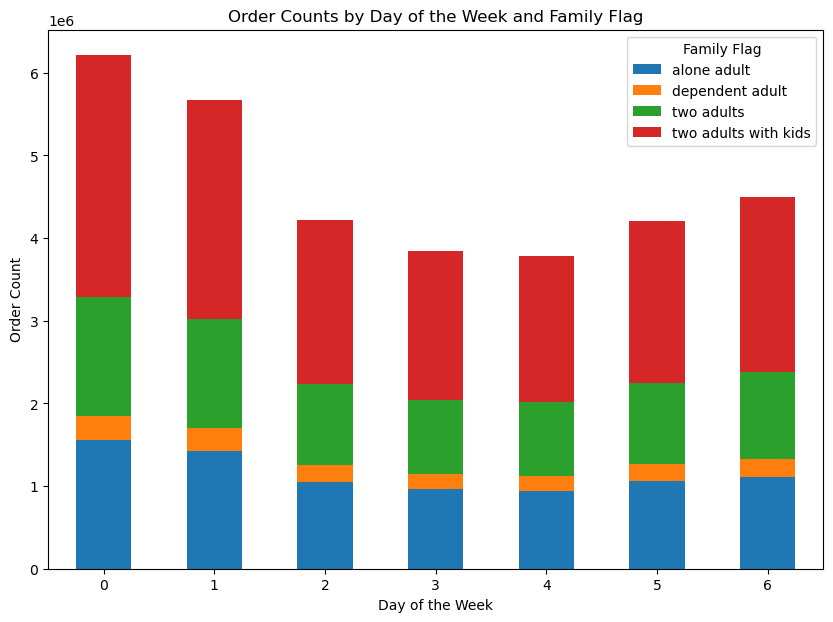

In [83]:
# Group by 'order_day_of_week' and 'family_flag', then count the occurrences
grouped = profiles.groupby(['order_day_of_week', 'family_flag']).size().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.title('Order Counts by Day of the Week and Family Flag')
plt.legend(title='Family Flag')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_orders_fam-flag_dow.png')) # Save the plot

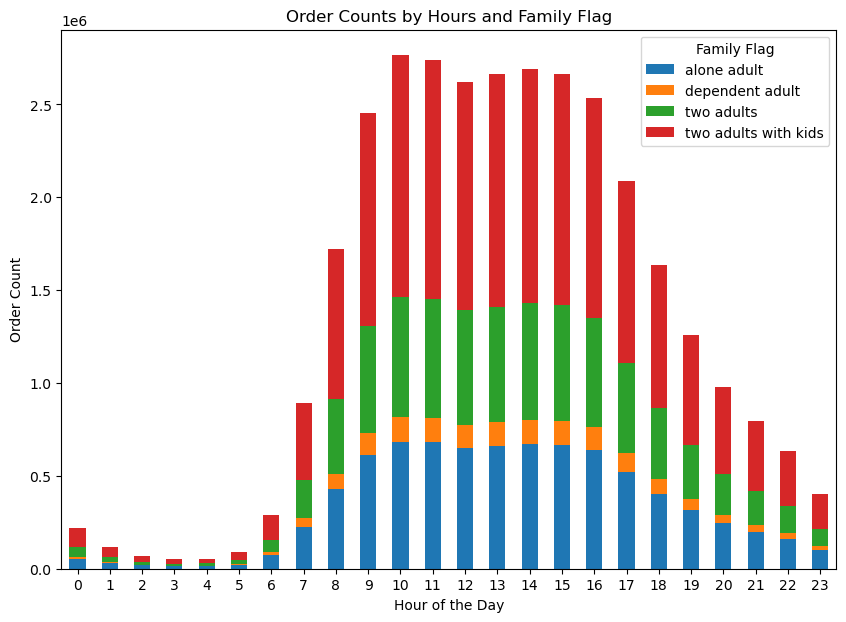

In [84]:
# Group by 'order_hour_of_day' and 'family_flag', then count the occurrences
grouped = profiles.groupby(['order_hour_of_day', 'family_flag']).size().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')
plt.title('Order Counts by Hours and Family Flag')
plt.legend(title='Family Flag')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_orders_fam-flag_hours.png')) # Save the plot

#### We see the distributions of orders by family flag along the week and hours of the day. <br> It looks like the proportions of each family group is maintained across these timepoints.

In [96]:
profiles.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'product_name', 'department_id', 'prices',
       'price_range', 'max_order', 'loyalty_flag', 'avg_price_user',
       'spender_type', 'name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'age_category', 'income_category', 'family_flag'],
      dtype='object')

C:\Users\asicz\AppData\Local\Temp\ipykernel_10592\112736072.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = profiles.groupby(['age_category', 'loyalty_flag']).size().unstack(fill_value=0)


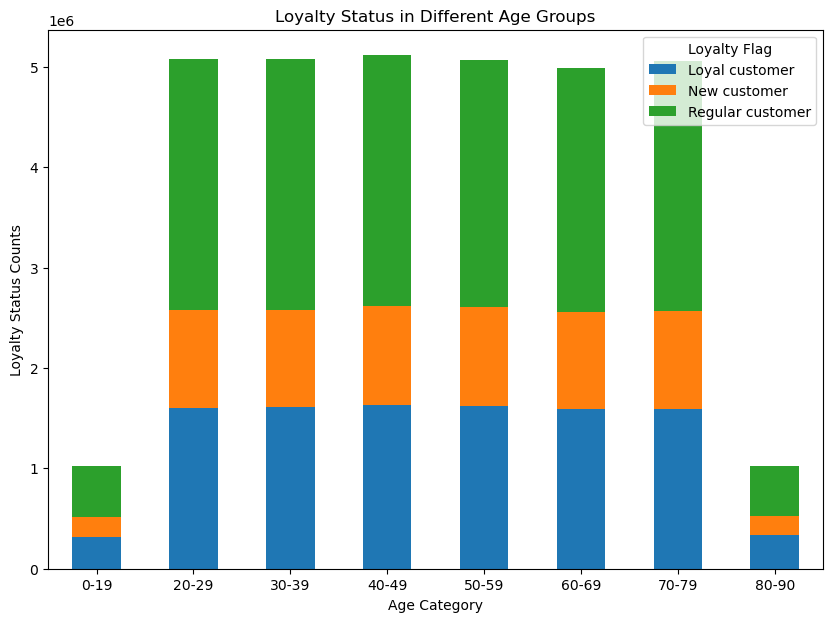

In [101]:
# Loyalty status in different age groups
grouped = profiles.groupby(['age_category', 'loyalty_flag']).size().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Age Category')
plt.ylabel('Loyalty Status Counts')
plt.title('Loyalty Status in Different Age Groups')
plt.legend(title='Loyalty Flag')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_loyalty_age.png')) # Save the plot

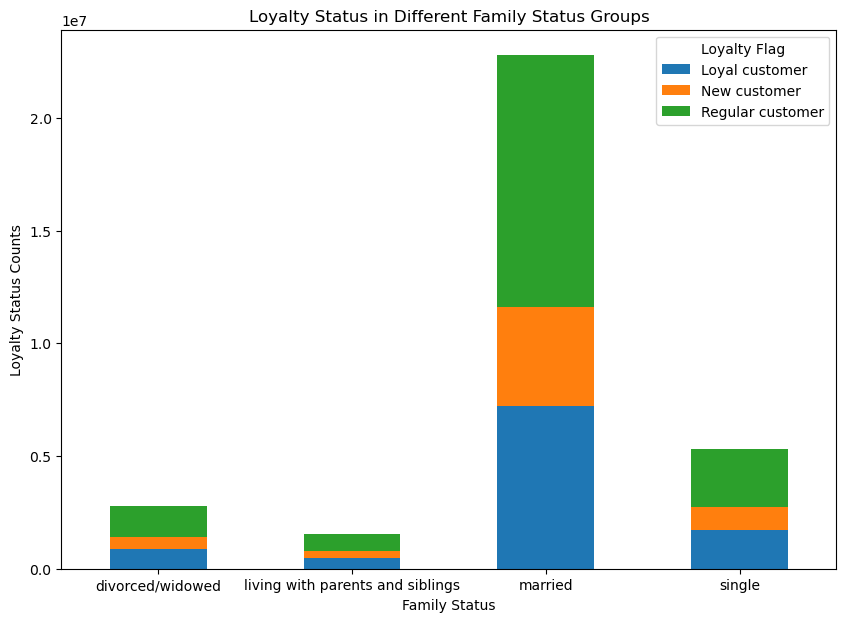

In [102]:
# Loyalty status in different family status groups
grouped = profiles.groupby(['fam_status', 'loyalty_flag']).size().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Family Status')
plt.ylabel('Loyalty Status Counts')
plt.title('Loyalty Status in Different Family Status Groups')
plt.legend(title='Loyalty Flag')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_loyalty_fam.png')) # Save the plot

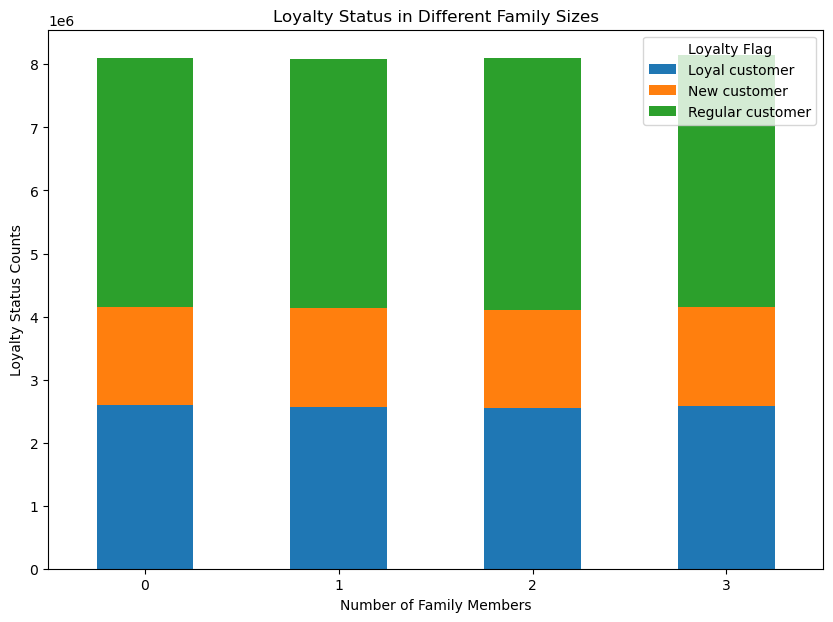

In [103]:
# Loyalty status in different family size groups
grouped = profiles.groupby(['n_dependants', 'loyalty_flag']).size().unstack(fill_value=0)

# Plotting the data
grouped.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Number of Family Members')
plt.ylabel('Loyalty Status Counts')
plt.title('Loyalty Status in Different Family Sizes')
plt.legend(title='Loyalty Flag')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_loyalty_fam_size.png')) # Save the plot

In [112]:
# Count spender types
profiles['spender_type'].value_counts(dropna=False)

spender_type
Low spender     32315179
High spender      119497
NaN                  383
Name: count, dtype: int64

In [114]:
# Extract mean amount of money spent by High- vs. Low- spenders
profiles.groupby('spender_type').agg({'prices': ['mean']})

,prices
,mean
spender_type,
High spender,10.580564
Low spender,7.780655


In [115]:
# Calculate mean revenue by spender type
low_spender_revenue = 32315179*7.780655
print('Low spenders provide company with average income of ', low_spender_revenue, '$')
high_spender_revenue = 119497*10.580564
print('High spenders provide company with average income of ', high_spender_revenue, '$')

Low spenders provide company with average income of  251433259.062245 $
High spenders provide company with average income of  1264345.656308 $


<Figure size 1000x600 with 0 Axes>

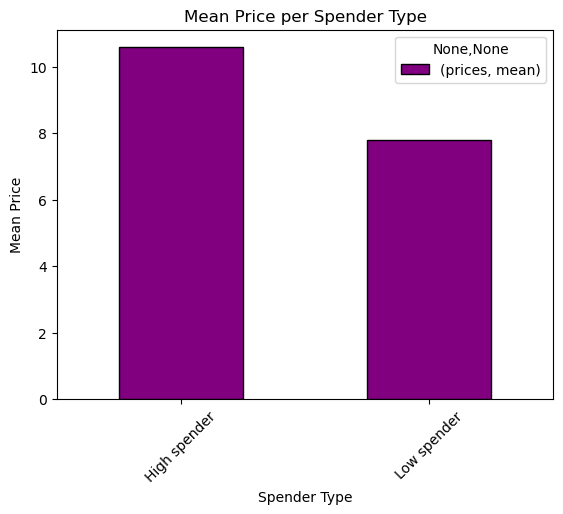

In [110]:
# Plot distribution of prices within spenders category as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('spender_type').agg({'prices': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')

# Add labels and title
plt.xlabel('Spender Type')
plt.ylabel('Mean Price')
plt.title('Mean Price per Spender Type')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_prices_spenders.png')) # Save the plot

<Figure size 1000x600 with 0 Axes>

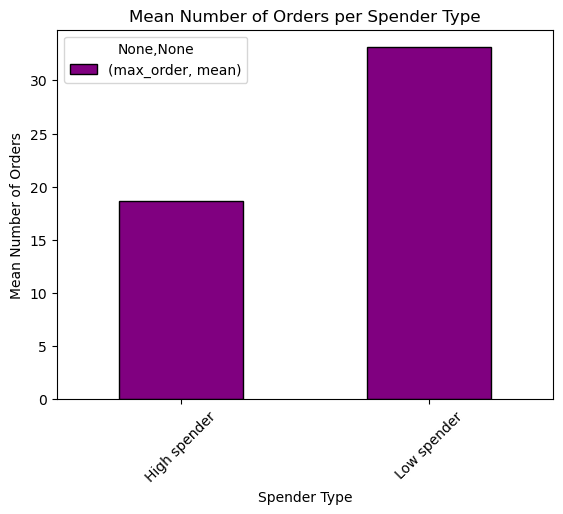

In [116]:
# Plot distribution of orders within spenders category as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('spender_type').agg({'max_order': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')

# Add labels and title
plt.xlabel('Spender Type')
plt.ylabel('Mean Number of Orders')
plt.title('Mean Number of Orders per Spender Type')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_orders_spenders.png')) # Save the plot

In [122]:
pd.crosstab(profiles['age_category'], profiles['spender_type'])

spender_type,High spender,Low spender
age_category,,
0-19,4103,1016979
20-29,16375,5058785
30-39,18350,5059782
40-49,20966,5092991
50-59,19206,5049904
60-69,19265,4972796
70-79,17042,5042723
80-90,4190,1021219


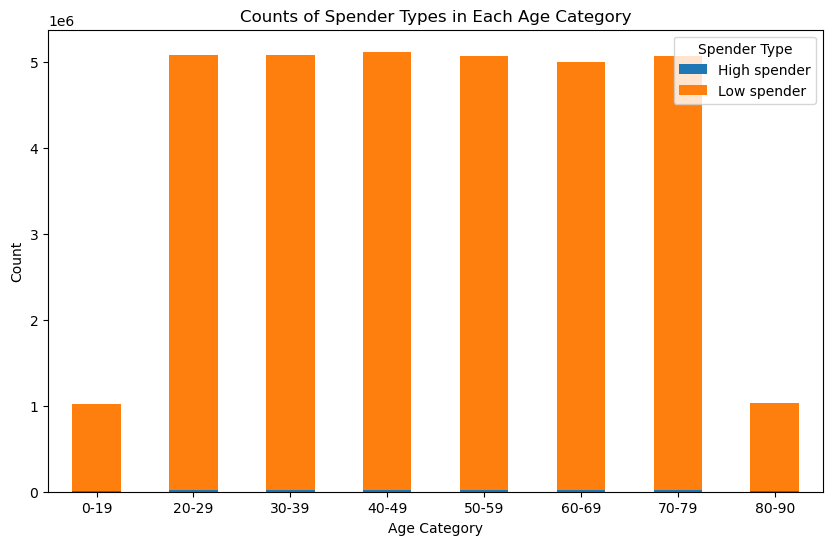

In [127]:
# Create a crosstab to count the occurrences of each spender type in each age category
spender_counts = pd.crosstab(profiles['age_category'], profiles['spender_type'])

# Plotting the counts
spender_counts.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Counts of Spender Types in Each Age Category')
plt.xticks(rotation=0)
plt.legend(title='Spender Type')
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_age_spenders.png')) # Save the plot

In [123]:
pd.crosstab(profiles['income_category'], profiles['spender_type'])

spender_type,High spender,Low spender
income_category,,
25000-75000,28921,10424165
75001-125000,53274,13289751
125001-175000,36640,8294373
175001-225000,631,87366
225001-27500,16,78636
275001-325000,0,51415
325001-375000,0,30760
375001-425000,0,23315
425001-475000,15,12148


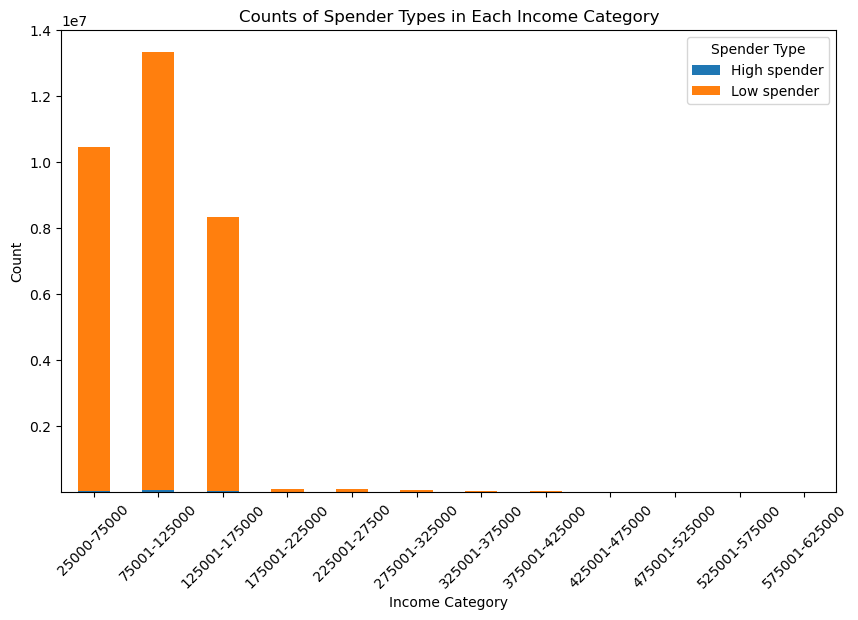

In [126]:
# Create a crosstab to count the occurrences of each spender type in each income category
spender_counts = pd.crosstab(profiles['income_category'], profiles['spender_type'])

# Plotting the counts
spender_counts.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Counts of Spender Types in Each Income Category')
plt.xticks(rotation=45)
plt.legend(title='Spender Type')
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_income_spenders.png')) # Save the plot

In [128]:
# Check the numbers from graph above
profiles['income_category'].value_counts(dropna=False)

income_category
75001-125000     13343232
25000-75000      10453129
125001-175000     8331146
175001-225000       87997
225001-27500        78652
275001-325000       51415
325001-375000       30760
375001-425000       23315
425001-475000       12163
525001-575000        9732
475001-525000        9305
575001-625000        4213
Name: count, dtype: int64

In [133]:
# Check the distribution of high income customers among regions
pd.crosstab(profiles['income_category'], profiles['region'])

region,Midwest,Northeast,South,West
income_category,,,,
25000-75000,2430181,1823962,1887732,4311254
75001-125000,3118458,2363644,2320553,5540577
125001-175000,1978197,1492177,1470206,3390566
175001-225000,19993,13979,15090,38935
225001-27500,19206,10667,11356,37423
275001-325000,10408,10005,10992,20010
325001-375000,8284,4229,5220,13027
375001-425000,5823,3488,3712,10292
425001-475000,4569,2600,722,4272


<Figure size 1000x600 with 0 Axes>

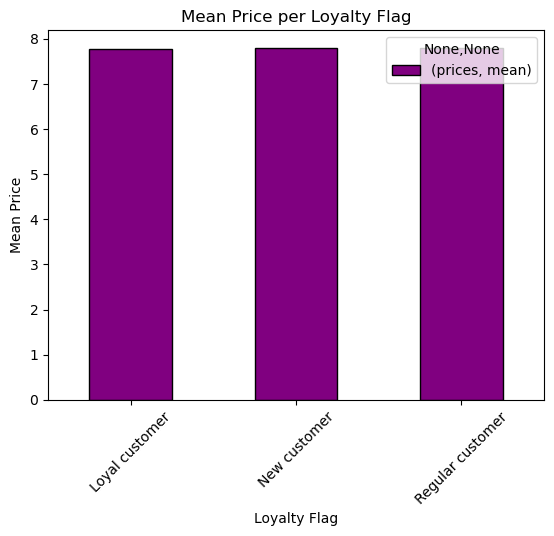

In [111]:
# Plot distribution of prices within loyalty category as a bar chart
plt.figure(figsize=(10, 6))
profiles.groupby('loyalty_flag').agg({'prices': ['mean']}).plot(kind='bar', color='purple', edgecolor='black')

# Add labels and title
plt.xlabel('Loyalty Flag')
plt.ylabel('Mean Price')
plt.title('Mean Price per Loyalty Flag')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_prices_loyalty.png')) # Save the plot